# Project: Wrangle and Analyze WeRateDogs twitter data

# Project Details
Data wrangling, which consists of:
1. Gathering data
- From 'twitter-archive-enhanced.csv' file.
- From a URL.
- From twitter API (need developer account).

2. Assessing data
3. Cleaning data
- Storing, analyzing, and visualizing your wrangled data


In [1]:
import numpy as np
import pandas as pd
import requests
import tweepy
import json
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()


## Gather Data
We have 3 sources of the data:
1. CSV file from Udacity twitter_archive_enhanced.csv
2. Programmatically we can get data from Udacity's server using the url 
3. By using Twitter API


### Gather data from CSV file

In [2]:
ds=pd.read_csv('twitter-archive-enhanced.csv')
ds.head

<bound method NDFrame.head of           tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     8.920000e+17                    NaN                  NaN   
1     8.920000e+17                    NaN                  NaN   
2     8.920000e+17                    NaN                  NaN   
3     8.920000e+17                    NaN                  NaN   
4     8.910000e+17                    NaN                  NaN   
...            ...                    ...                  ...   
2351  6.660000e+17                    NaN                  NaN   
2352  6.660000e+17                    NaN                  NaN   
2353  6.660000e+17                    NaN                  NaN   
2354  6.660000e+17                    NaN                  NaN   
2355  6.660000e+17                    NaN                  NaN   

                      timestamp  \
0     2017-08-01 16:23:56 +0000   
1     2017-08-01 00:17:27 +0000   
2     2017-07-31 00:18:03 +0000   
3     2017-07-30 15:58:51 +0000   
4 

#### Get the tweet_id from the URL

In [3]:
ds.tweet_id=ds.expanded_urls.str.extract('(\d{18})')
ds.tweet_id[0:10]

0    892420643555336193
1    892177421306343426
2    891815181378084864
3    891689557279858688
4    891327558926688256
5    891087950875897856
6    890971913173991426
7    890729181411237888
8    890609185150312448
9    890240255349198849
Name: tweet_id, dtype: object

### Downloading the file by sending the URL as parameter using requests library

In [4]:
URL = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
req= requests.get(URL)
with open('image_prediction.tsv',mode='wb')as file:
    file.write(req.content)
img_data=pd.read_csv('image_prediction.tsv',delimiter='\t')

### Gather the data from twitter API using Tweepy library and store data

Needs developer acount from twitter to get token keys

In [5]:
consumer_key = 'secret key '
consumer_secret = 'secret key'
access_token = 'secret kkey'
access_secret = 'secret key'


auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit=True,wait_on_rate_limit_notify=True)

dev_data=pd.DataFrame(columns=['tweet_id','retweet_count','favorite_count'])
with open('tweet_json.txt','r')as file:
    for line in file:
        tweet_id,retweet_count,favorite_count=line[:-1].split(' ')
        dev_data=dev_data.append({'tweet_id':tweet_id,'retweet_count':retweet_count,'favorite_count':favorite_count},ignore_index=True)

### Gathering Summary
As we saw the code we have gathered the data using three methodology.

## Assess Data

After we gather the data in many ways we will to assess the data programmatically and visually.


In [6]:
ds.head(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [7]:
ds.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
0         1
120       1
7         1
170       1
150       1
130       1
90        1
110       1
2         1
70        1
40        1
16        1
15        1
Name: rating_denominator, dtype: int64

In [8]:
img_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [9]:
dev_data.head(20)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8836,39455
1,892177421306343426,6475,33767
2,891815181378084864,4296,25427
3,891689557279858688,8915,42831
4,891327558926688256,9708,40978
5,891087950875897856,3237,20538
6,890971913173991426,2140,12048
7,890729181411237888,19527,66584
8,890609185150312448,4396,28169
9,890240255349198849,7665,32446


In [10]:
dev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2186 entries, 0 to 2185
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2186 non-null   object
 1   retweet_count   2186 non-null   object
 2   favorite_count  2186 non-null   object
dtypes: object(3)
memory usage: 51.4+ KB


In [11]:
dev_data.head(20)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8836,39455
1,892177421306343426,6475,33767
2,891815181378084864,4296,25427
3,891689557279858688,8915,42831
4,891327558926688256,9708,40978
5,891087950875897856,3237,20538
6,890971913173991426,2140,12048
7,890729181411237888,19527,66584
8,890609185150312448,4396,28169
9,890240255349198849,7665,32446


In [12]:
dev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2186 entries, 0 to 2185
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2186 non-null   object
 1   retweet_count   2186 non-null   object
 2   favorite_count  2186 non-null   object
dtypes: object(3)
memory usage: 51.4+ KB


### Quality
- I noticed that in the first dataset (ds),the tweet_ID has wrong data type and value. I extracted the tweet_ID from expanded_urls, eventhough some tweet_ID are missing.
- Wrong datatypes + values for in_reply_to_status_id,in_reply_to_user_id 
- For ds, the denominator must be 10.
- For ds, wrong datatype for timestamp 
- For ds, many dog names are not correct.
- For (img_data), many predictions are not dogs.
- For ds, after we get rid of retweets the colmuns 'retweeted_status_id' 'retweeted_status_user_id' and 'retweeted_status_timestamp' are not useful. 
- Columns (doggo, floofer, pupper, puppo) has None for missing values.  
 

### Tidiness
- We can notice that In ds, the columns 'doggo', 'floofer', 'pupper','puppo' shows one variable.
- We can notice that the all datasets must be combined

- we have the following columns (p1, p1_dog, ...etc) need to be just breed and confidence.



## Clean Data

In [13]:
ds_clean=ds.copy()
img_data_clean=img_data.copy()
dev_data_clean=dev_data.copy()

#####  Issue
tweet_id are missed for many obserevations

##### Define
- Without ID: Delete retweets and observations to keep the original.
- Delete columns: 'retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'

##### Code

In [14]:
ds_clean=ds_clean[ds.tweet_id.notnull()]
ds_clean=ds_clean[ds.retweeted_status_id.isnull()]
ds_clean=ds_clean.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis=1)

<ipython-input-14-ddfe763270c2>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ds_clean=ds_clean[ds.retweeted_status_id.isnull()]


#### Test

In [15]:
ds_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2023 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2023 non-null   object 
 1   in_reply_to_status_id  23 non-null     float64
 2   in_reply_to_user_id    23 non-null     float64
 3   timestamp              2023 non-null   object 
 4   source                 2023 non-null   object 
 5   text                   2023 non-null   object 
 6   expanded_urls          2023 non-null   object 
 7   rating_numerator       2023 non-null   int64  
 8   rating_denominator     2023 non-null   int64  
 9   name                   2023 non-null   object 
 10  doggo                  2023 non-null   object 
 11  floofer                2023 non-null   object 
 12  pupper                 2023 non-null   object 
 13  puppo                  2023 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 237.1+

#### Issue
We need ratings with images.
#### Define
we will delete observations without image
#### Code

In [16]:
img_data_clean.tweet_id=img_data_clean.tweet_id.astype(str)
image_id=img_data_clean[['tweet_id']]
ds_clean=pd.merge(ds_clean,image_id,on='tweet_id')

#### Test

In [17]:
ds_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               1994 non-null   object 
 1   in_reply_to_status_id  23 non-null     float64
 2   in_reply_to_user_id    23 non-null     float64
 3   timestamp              1994 non-null   object 
 4   source                 1994 non-null   object 
 5   text                   1994 non-null   object 
 6   expanded_urls          1994 non-null   object 
 7   rating_numerator       1994 non-null   int64  
 8   rating_denominator     1994 non-null   int64  
 9   name                   1994 non-null   object 
 10  doggo                  1994 non-null   object 
 11  floofer                1994 non-null   object 
 12  pupper                 1994 non-null   object 
 13  puppo                  1994 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 233.7+

#### Issue
The 'name','doggo','puppo','floofer'is None.

#### Define
Change None for the above column to np.nan

#### Code

In [18]:
change_array = ['doggo', 'floofer', 'pupper', 'puppo']
for i in change_array:
    ds_clean[i] = ds_clean[i].replace('None', np.nan)


#### Test

In [19]:
ds_clean.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,NaN,NaN,NaN,NaN
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,NaN,NaN,NaN,NaN
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,NaN,NaN,NaN,NaN
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,NaN,NaN,NaN,NaN
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,NaN,NaN,NaN


####  Issue
In ds the datatype for timestamp is wrong
#### Define
Chagne the timestamp to datetime datatype.
#### Code

In [20]:
ds_clean.timestamp=pd.to_datetime(ds_clean.timestamp)

#### Test

In [21]:
ds_clean.timestamp.dtype

datetime64[ns, UTC]

####  Issue
For in_reply_to_user_id, in_reply_to_status_id the datatype and value are wrong
#### Define
Change in_reply_to_user_id, in_reply_to_status_id to string data type. From API Query the data
#### Code

In [22]:
reply_id=ds_clean.tweet_id[ds_clean.in_reply_to_user_id.notnull()]
ds_clean.in_reply_to_user_id=ds_clean.in_reply_to_user_id.astype(str)
ds_clean.in_reply_to_status_id=ds_clean.in_reply_to_status_id.astype(str)
for each_id in reply_id:
    tweet_info=api.get_status(each_id,tweet_mode='extended')
    ds_clean.loc[ds_clean.tweet_id==each_id, 'in_reply_to_user_id']=str(tweet_info.in_reply_to_user_id)
    ds_clean.loc[ds_clean.tweet_id==each_id, 'in_reply_to_status_id']=str(tweet_info.in_reply_to_status_id)
ds_clean.in_reply_to_user_id=ds_clean.in_reply_to_user_id.replace('nan',np.nan)
ds_clean.in_reply_to_status_id=ds_clean.in_reply_to_status_id.replace('nan',np.nan)

#### Test

In [23]:
ds_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1994 non-null   object             
 1   in_reply_to_status_id  23 non-null     object             
 2   in_reply_to_user_id    23 non-null     object             
 3   timestamp              1994 non-null   datetime64[ns, UTC]
 4   source                 1994 non-null   object             
 5   text                   1994 non-null   object             
 6   expanded_urls          1994 non-null   object             
 7   rating_numerator       1994 non-null   int64              
 8   rating_denominator     1994 non-null   int64              
 9   name                   1994 non-null   object             
 10  doggo                  74 non-null     object             
 11  floofer                8 non-null      object           

In [24]:
ds_clean[ds_clean.in_reply_to_user_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
119,863079547188785154,667152164079423490,4196983835,2017-05-12 17:12:53+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Ladies and gentlemen... I found Pipsy. He may ...,https://twitter.com/dog_rates/status/863079547...,14,10,None,NaN,NaN,NaN,NaN
146,856526610513747968,855818117272018944,4196983835,2017-04-24 15:13:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...","THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY...",https://twitter.com/dog_rates/status/856526610...,14,10,None,NaN,NaN,NaN,NaN
192,844979544864018432,759099523532779520,4196983835,2017-03-23 18:29:57+00:00,"<a href=""http://twitter.com/download/iphone"" r...",PUPDATE: I'm proud to announce that Toby is 23...,https://twitter.com/dog_rates/status/844979544...,13,10,None,NaN,NaN,NaN,NaN
419,802265048156610565,733109485275860992,4196983835,2016-11-25 21:37:47+00:00,"<a href=""http://twitter.com/download/iphone"" r...","Like doggo, like pupper version 2. Both 11/10 ...",https://twitter.com/dog_rates/status/802265048...,11,10,None,doggo,NaN,pupper,NaN
756,746906459439529985,746885919387574272,4196983835,2016-06-26 03:22:31+00:00,"<a href=""http://twitter.com/download/iphone"" r...","PUPDATE: can't see any. Even if I could, I cou...",https://twitter.com/dog_rates/status/746906459...,0,10,None,NaN,NaN,NaN,NaN
758,746818907684614144,691416866452082688,4196983835,2016-06-25 21:34:37+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Guys... Dog Jesus 2.0\n13/10 buoyant af https:...,https://twitter.com/dog_rates/status/746818907...,13,10,None,NaN,NaN,NaN,NaN
855,729838605770891264,729113531270991872,4196983835,2016-05-10 01:00:58+00:00,"<a href=""http://twitter.com/download/iphone"" r...","""Challenge completed"" \n(pupgraded to 12/10) h...",https://twitter.com/dog_rates/status/729838605...,12,10,None,NaN,NaN,NaN,NaN
1035,705786532653883392,703255935813287936,4196983835,2016-03-04 16:06:36+00:00,"<a href=""http://twitter.com/download/iphone"" r...","Seriously, add us 🐶 11/10 for sad wet pupper h...",https://twitter.com/dog_rates/status/705786532...,11,10,None,NaN,NaN,pupper,NaN
1044,704871453724954624,667152164079423490,4196983835,2016-03-02 03:30:25+00:00,"<a href=""http://twitter.com/download/iphone"" r...",I found a forest Pipsy. 12/10 https://t.co/mIQ...,https://twitter.com/dog_rates/status/704871453...,12,10,None,NaN,NaN,NaN,NaN
1059,703425003149250560,703041949650034688,4196983835,2016-02-27 03:42:44+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Really guys? Again? I know this is a rare Alba...,https://twitter.com/dog_rates/status/703425003...,9,10,None,NaN,NaN,NaN,NaN


####  Issue
In ds, For the column ‘name’ null is written as None , some values are not corret in name. 
#### Define
Set the value wrong names to 'None' and replace 'None' with np.nan.
For the wrong values in name put it as 'None' and then change it to np.nan 
#### Code

In [25]:
ds_clean.loc[ds_clean.name.str.islower(),'name']='None'
ds_clean.name=ds_clean.name.replace('None',np.nan)

#### Test

In [26]:
ds_clean.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,NaN,NaN,NaN,NaN,NaN
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,NaN,NaN,NaN,NaN
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40+00:00,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,NaN,NaN,NaN,NaN,NaN
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,NaN,NaN,NaN,NaN
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,NaN,NaN,NaN


#####  Issue
For denomiator there are a values that are more than 10 or less
##### Define
delete the values that are more than 10 or less
##### Code

In [27]:
ds_clean = ds_clean[ds_clean['rating_denominator'] == 10]


#### Test

In [28]:
ds_clean[['rating_numerator', 'rating_denominator']].describe()



,rating_numerator,rating_denominator
count,1976.000000,1976.0
mean,11.698381,10.0
std,40.851248,0.0
min,0.000000,10.0
25%,10.000000,10.0
50%,11.000000,10.0
75%,12.000000,10.0
max,1776.000000,10.0


####  Issue
For the (img_data), many predictions were not dogs and there is no spicific column for the posibility of the breed.
#### Define
Add another columns predicted_conf and predicted_breed for the posibility of the breed and the Confident.
#### Code

In [29]:
img_data_clean['predicted_breed']=img_data_clean.p1
img_data_clean.predicted_breed[img_data_clean.p1_dog==False]=img_data_clean.p2
img_data_clean.predicted_breed[(img_data_clean.p1_dog==False)&(img_data_clean.p2_dog==False)]= img_data_clean.p3
img_data_clean.predicted_breed[(img_data_clean.p1_dog==False)&(img_data_clean.p2_dog==False)&(img_data_clean.p3_dog==False)]='None' 
img_data_clean.predicted_breed=img_data_clean.predicted_breed.replace('None',np.nan)
img_data_clean.predicted_breed[:20]

<ipython-input-29-f2e83cf0b8b2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  img_data_clean.predicted_breed[img_data_clean.p1_dog==False]=img_data_clean.p2
<ipython-input-29-f2e83cf0b8b2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  img_data_clean.predicted_breed[(img_data_clean.p1_dog==False)&(img_data_clean.p2_dog==False)]= img_data_clean.p3
<ipython-input-29-f2e83cf0b8b2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  img_

0     Welsh_springer_spaniel
1                    redbone
2            German_shepherd
3        Rhodesian_ridgeback
4         miniature_pinscher
5       Bernese_mountain_dog
6                        NaN
7                       chow
8           golden_retriever
9           miniature_poodle
10          golden_retriever
11             Gordon_setter
12              Walker_hound
13                       pug
14                bloodhound
15                     Lhasa
16            English_setter
17                       NaN
18                       NaN
19         Italian_greyhound
Name: predicted_breed, dtype: object

In [30]:
img_data_clean['predicted_conf']=img_data_clean.p1_conf
img_data_clean.predicted_conf[img_data_clean.p1_dog==False]=img_data_clean.p2_conf
img_data_clean.predicted_conf[(img_data_clean.p1_dog==False)&(img_data_clean.p2_dog==False)]= img_data_clean.p3_conf
img_data_clean.predicted_conf[(img_data_clean.p1_dog==False)&(img_data_clean.p2_dog==False)&(img_data_clean.p3_dog==False)]=0 
img_data_clean.predicted_conf=img_data_clean.predicted_conf.replace(0,np.nan)
img_data_clean.predicted_conf[:20]

<ipython-input-30-18fc94941570>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  img_data_clean.predicted_conf[img_data_clean.p1_dog==False]=img_data_clean.p2_conf
<ipython-input-30-18fc94941570>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  img_data_clean.predicted_conf[(img_data_clean.p1_dog==False)&(img_data_clean.p2_dog==False)]= img_data_clean.p3_conf
<ipython-input-30-18fc94941570>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

0     0.465074
1     0.506826
2     0.596461
3     0.408143
4     0.560311
5     0.651137
6          NaN
7     0.692517
8     0.007959
9     0.201493
10    0.775930
11    0.503672
12    0.260857
13    0.489814
14    0.195217
15    0.582330
16    0.298617
17         NaN
18         NaN
19    0.176053
Name: predicted_conf, dtype: float64

####  Issue (tidiness issue)
For following columns 'name', 'doggo', 'floofer', 'pupper','puppo', are seperated from each other.


#### Define
We will create column 'dog_stage' to show the dog in which stage and drop columns 'doggo','floofer','pupper','puppo'. Replace 'None' with np.nan.
#### Code

In [31]:
ds_clean.doggo.replace('None', '', inplace=True)
ds_clean.floofer.replace('None', '', inplace=True)
ds_clean.pupper.replace('None', '', inplace=True)
ds_clean.puppo.replace('None', '', inplace=True)
#join them.
ds_clean['dog_stage'] = ds_clean.doggo + ds_clean.floofer + ds_clean.pupper + ds_clean.puppo
ds_clean.loc[ds_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
ds_clean.loc[ds_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
ds_clean.loc[ds_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'

#drop 'doggo','floofer','pupper','puppo'.
ds_clean.loc[ds_clean.dog_stage == '', 'dog_stage'] = np.nan
ds_clean=ds_clean.drop(['doggo','floofer','pupper','puppo'],axis=1)

#### Test


In [32]:
ds_clean.dog_stage.value_counts()



Series([], Name: dog_stage, dtype: int64)

In [33]:
ds_clean.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,NaN,NaN
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,NaN
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40+00:00,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,NaN,NaN
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,NaN
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,NaN


#### Define 
Create new columns (breed and confidence) that have the highest confidence prediction and drop other columns

In [34]:
Dog_Breed = []
Confidences = []
for index, row in img_data_clean.iterrows():
    if row['p1_dog'] and row['p1_conf'] == max([row['p1_conf'], row['p2_conf'], row['p3_conf']]):
        Dog_Breed.append(row['p1'])
        Confidences.append(row['p1_conf'])
    elif row['p2_dog'] and row['p2_conf'] == max([row['p1_conf'], row['p2_conf'], row['p3_conf']]):
        Dog_Breed.append(row['p2'])
        Confidences.append(row['p2_conf'])
    elif row['p3_dog'] and row['p3_conf'] == max([row['p1_conf'], row['p2_conf'], row['p3_conf']]):
        Dog_Breed.append(row['p3'])
        Confidences.append(row['p3_conf'])
    else:
        Dog_Breed.append(np.nan)
        Confidences.append(np.nan)
  


img_data_clean['Dog_Breed'] = Dog_Breed
img_data_clean['Confidences'] = Confidences


In [35]:
img_data_clean = img_data_clean[['tweet_id', 'jpg_url', 'Dog_Breed', 'Confidences']]

#### Test

In [36]:
img_data_clean.head(5)


,tweet_id,jpg_url,Dog_Breed,Confidences
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311


##### Last Test

In [37]:
ds_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1976 entries, 0 to 1993
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1976 non-null   object             
 1   in_reply_to_status_id  22 non-null     object             
 2   in_reply_to_user_id    22 non-null     object             
 3   timestamp              1976 non-null   datetime64[ns, UTC]
 4   source                 1976 non-null   object             
 5   text                   1976 non-null   object             
 6   expanded_urls          1976 non-null   object             
 7   rating_numerator       1976 non-null   int64              
 8   rating_denominator     1976 non-null   int64              
 9   name                   1347 non-null   object             
 10  dog_stage              0 non-null      object             
dtypes: datetime64[ns, UTC](1), int64(2), object(8)
memory us

In [38]:
img_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   tweet_id     2075 non-null   object 
 1   jpg_url      2075 non-null   object 
 2   Dog_Breed    1532 non-null   object 
 3   Confidences  1532 non-null   float64
dtypes: float64(1), object(3)
memory usage: 65.0+ KB


In [39]:
dev_data.columns


Index(['tweet_id', 'retweet_count', 'favorite_count'], dtype='object')

## Store Data
In the last thing we will save all the datasets to one csv file with the name 'twitter_archive_master'

In [40]:
master_dataset = pd.merge(ds_clean, img_data_clean, on='tweet_id')
master = pd.merge(master_dataset, dev_data_clean, on = 'tweet_id', how = 'inner')
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2116
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2117 non-null   object             
 1   in_reply_to_status_id  22 non-null     object             
 2   in_reply_to_user_id    22 non-null     object             
 3   timestamp              2117 non-null   datetime64[ns, UTC]
 4   source                 2117 non-null   object             
 5   text                   2117 non-null   object             
 6   expanded_urls          2117 non-null   object             
 7   rating_numerator       2117 non-null   int64              
 8   rating_denominator     2117 non-null   int64              
 9   name                   1451 non-null   object             
 10  dog_stage              0 non-null      object             
 11  jpg_url                2117 non-null   object           

In [41]:
master.to_csv('twitter_archive_master.csv')

In [42]:
Dataset_master = pd.read_csv('twitter_archive_master.csv',index_col = False, encoding = 'utf-8')




#### Test the master

In [43]:
Dataset_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2117 entries, 0 to 2116
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             2117 non-null   int64  
 1   tweet_id               2117 non-null   int64  
 2   in_reply_to_status_id  22 non-null     float64
 3   in_reply_to_user_id    22 non-null     float64
 4   timestamp              2117 non-null   object 
 5   source                 2117 non-null   object 
 6   text                   2117 non-null   object 
 7   expanded_urls          2117 non-null   object 
 8   rating_numerator       2117 non-null   int64  
 9   rating_denominator     2117 non-null   int64  
 10  name                   1451 non-null   object 
 11  dog_stage              0 non-null      float64
 12  jpg_url                2117 non-null   object 
 13  Dog_Breed              1571 non-null   object 
 14  Confidences            1571 non-null   float64
 15  retw

## Analysis
Let's see the rating ditribution

/Users/adialageel/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


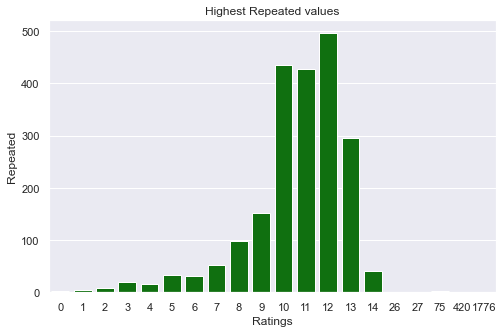

In [44]:
#dd = master.rating_numerator.value_counts()

x_axis = master.rating_numerator.value_counts().index
y_axis = master.rating_numerator.value_counts().values
fig, ax = plt.subplots(figsize=(8, 5))
g = sns.barplot(x_axis, y_axis, color ='green', ax=ax)
ax.set(xlabel='Ratings', ylabel='Repeated', title='Highest Repeated values')
plt.show()

/Users/adialageel/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


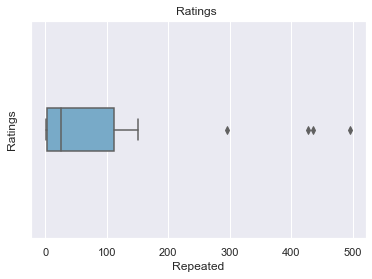

In [45]:
showing_dd = master.rating_numerator.value_counts()

axis = sns.boxplot(showing_dd, orient='h', width=0.2, palette = 'Blues')
axis.set(xlabel='Repeated', ylabel='Ratings', title='Ratings ')
plt.show()

<Figure size 1440x1440 with 0 Axes>

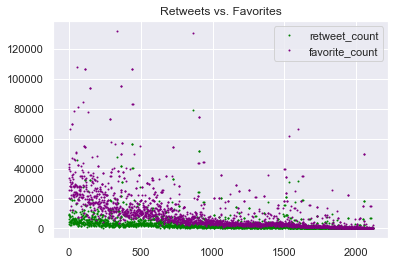

In [46]:
plt.figure(figsize = (20, 20))
Dataset_master[['retweet_count', 'favorite_count']].plot(style = '.', color=['green','purple'],  ms=2)
plt.title('Retweets vs. Favorites');

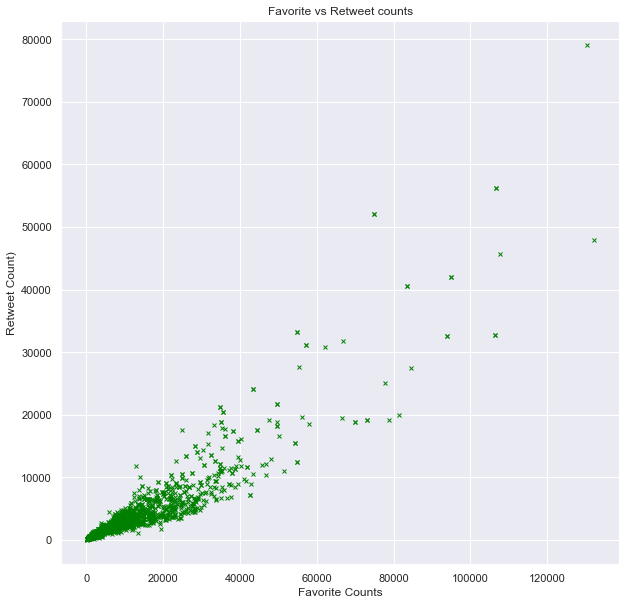

In [47]:
plt.figure(figsize = (10, 10))
plt.plot(Dataset_master.favorite_count, Dataset_master.retweet_count, marker='x', linestyle='', ms=4, color = 'green' )
plt.title('Favorite vs Retweet counts')
plt.xlabel('Favorite Counts')
plt.ylabel('Retweet Count)')
plt.show()

#### Insights

- We can see that the rating with from 10-13 has must repeated values 
- We can see that the median in the box is close to the first quartile and there are an outliers, also we can notice that the IQR is skin in this box plot
- We can see from the last visual there is corrolation between retweets and favorite. As we can see if tweet get liked then it will get retweeted many times.